### Importing the necessary libraries ###

In [2]:
from pynytimes import NYTAPI
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

### Extracting the articles for 'Electronic Vehicles' or 'EVs' ###

In [4]:
from pynytimes import NYTAPI
import pandas as pd

# Initialize NYT API
API_KEY = "fAJ4xm2NlYHFyr8ubAuoayWJ7dxJ2qNK"  # Replace with your actual key
nyt = NYTAPI(API_KEY, parse_dates=True)

# Fetch 100 EV-Related Articles (hoping some are free)
ev_articles = nyt.article_search(
    query="EV OR Electric Vehicles",
    results=100,  # Fetch 100 articles
    options={
        "fq": 'document_type:("article") AND type_of_material:("News") AND source:("The New York Times")',
        "sort": "newest"
    }
)

# Convert to DataFrame
df_ev = pd.DataFrame(ev_articles)

# **Save Articles to CSV**
csv_filename = "ev_articles_100.csv"
df_ev.to_csv(csv_filename, index=False)

print(f"Saved {len(df_ev)} EV-related articles to '{csv_filename}'.")

C:\Users\Kaanchi Gupta\anaconda3\Lib\site-packages\pynytimes\helpers\article_search.py:33: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


Saved 100 EV-related articles to 'ev_articles_100.csv'.


### Display first 5 rows ###

In [6]:
df_ev.head()

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,print_section,print_page,subsection_name
0,"The direct air capture industry has ambitious plans to pull carbon dioxide from the atmosphere, ...",https://www.nytimes.com/2025/02/14/climate/direct-air-capture-power-energy-needs.html,"The direct air capture industry has ambitious plans to pull carbon dioxide from the atmosphere, ...","(Editors note: This is the second edition of The Climate Fix, a twice-a-month look at some of th...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'imag...","{'main': 'Will There Be Enough Power to Remove Carbon From the Sky?', 'kicker': None, 'content_k...","[{'name': 'subject', 'value': 'Global Warming', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'v...",2025-02-14 19:34:24+00:00,article,Climate,Climate,"{'original': 'By Allison Prang', 'person': [{'firstname': 'Allison', 'middlename': None, 'lastna...",News,nyt://article/9df47a90-58a9-5fb9-8c68-5b76e8d1c311,1172,nyt://article/9df47a90-58a9-5fb9-8c68-5b76e8d1c311,NaN,NaN,NaN
1,Some have halted work on the Biden-era $5 billion program to build E.V. charging stations. Other...,https://www.nytimes.com/2025/02/07/climate/trump-ev-charger-funding-freeze.html,Some have halted work on the Biden-era $5 billion program to build E.V. charging stations. Other...,A new federal order that freezes a Biden-era program to build a national network of electric veh...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'imag...","{'main': 'Trump Administration Move to Freeze E.V. Charger Funding Confounds States', 'kicker': ...","[{'name': 'subject', 'value': 'Global Warming', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'v...",2025-02-08 00:50:18+00:00,article,Climate,Climate,"{'original': 'By Coral Davenport and Madeleine Ngo', 'person': [{'firstname': 'Coral', 'middlena...",News,nyt://article/467dfbd4-bd27-56fb-b180-44e849285f86,893,nyt://article/467dfbd4-bd27-56fb-b180-44e849285f86,NaN,NaN,NaN
2,Executive orders and announcements by President Trump have put billions of dollars in U.S. clima...,https://www.nytimes.com/2025/01/30/climate/trump-climage-change-united-states-spending.html,Executive orders and announcements by President Trump have put billions of dollars in U.S. clima...,"Over the past four years during the Biden administration, the United States started spending eve...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'imag...","{'main': 'Trump’s First Two Weeks Have Thrown U.S. Climate Spending Into Chaos', 'kicker': None,...","[{'name': 'subject', 'value': 'Foreign Aid', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'valu...",2025-01-30 19:32:34+00:00,article,Climate,Climate,"{'original': 'By David Gelles', 'person': [{'firstname': 'David', 'middlename': None, 'lastname'...",News,nyt://article/6734ae36-377b-5b4f-ab79-d42ec18c759c,1214,nyt://article/6734ae36-377b-5b4f-ab79-d42ec18c759c,NaN,NaN,NaN
3,The former New York congressman has little experience in environmental policy. He is expected to...,https://www.nytimes.com/2025/01/29/climate/lee-zeldin-epa-confirmation.html,The former New York congressman has little experience in environmental policy. He is expected to...,"The Senate on Wednesday voted to confirm Lee Zeldin to run the Environmental Protection Agency, ...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'imag...","{'main': 'Senate Confirms Lee Zeldin to Head E.P.A.', 'kicker': None, 'content_kicker': None, 'p...","[{'name': 'persons', 'value': 'Zeldin, Lee M', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'va...",2025-01-29 21:39:30+00:00,article,Climate,Climate,"{'original': 'By Coral Davenport', 'person': [{'firstname': 'Co

### Saving dataframe to CSV ###

In [8]:
csv_filename = "ev_articles_100.csv"
df_ev.to_csv(csv_filename, index=False)

print(f"Saved {len(df_ev)} articles about EVs to '{csv_filename}'.")


Saved 100 articles about EVs to 'ev_articles_100.csv'.


### Extracting comments from the article URLs ### 

In [25]:
import pandas as pd
import time
import random
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.comments import fetch_comments_by_article, comments_to_df

# Step 1: Read and Sample URLs from the CSV File
def read_sampled_urls_from_csv(file_path, sample_size=20):
    """
    Reads a CSV file and extracts a random sample of article URLs and titles.

    Parameters:
    file_path (str): Path to the CSV file containing article URLs.
    sample_size (int): Number of articles to sample.

    Returns:
    pd.DataFrame: A DataFrame containing sampled article URLs and titles.
    """
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  # Remove extra spaces from column names
    print("Columns in the CSV file:", df.columns)

    # Ensure the CSV has the correct columns
    required_columns = ['web_url', 'headline']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Sample 15-20 articles
    sampled_df = df.sample(n=random.randint(15, 20), random_state=42)
    return sampled_df[['web_url', 'headline']].rename(columns={"web_url": "url", "headline": "title"})

# Step 2: Process Comments
def process_comment_thread(comment, article_url, article_title, all_comments):
    """
    Recursively process a comment and its replies, adding article metadata to each.

    Parameters:
    comment (dict): The comment to process.
    article_url (str): The URL of the article.
    article_title (str): The title of the article.
    all_comments (list): List to store all processed comments.
    """
    processed_comment = {
        "article_url": article_url,
        "article_title": article_title,
        "comment_text": comment.get("commentBody", "No comment text found"),  # Extract comment text
        "commenter": comment.get("userDisplayName", "Anonymous"),
        "recommendations": comment.get("recommendationCount", 0),
        "reply_count": comment.get("replyCount", 0),
        "status": comment.get("status", "N/A"),  # Approved, pending, rejected
        "parentID": comment.get("parentID", None)  # To track comment hierarchy
    }
    
    all_comments.append(processed_comment)  # Store the processed comment

    # **Fix: Ensure 'replies' key exists before accessing it**
    if comment.get("replies") and isinstance(comment["replies"], list):
        for reply in comment["replies"]:
            process_comment_thread(reply, article_url, article_title, all_comments)

# Step 3: Fetch Comments for Each Sampled Article
def fetch_comments_for_sampled_urls(api, articles_df):
    """
    Fetch comments for sampled articles and preserve article metadata.

    Parameters:
    api (NytApi): An instance of the NytApi class.
    articles_df (pd.DataFrame): DataFrame containing article URLs and titles.

    Returns:
    List[dict]: A list of comment dictionaries with article metadata.
    """
    all_comments = []

    for _, article in articles_df.iterrows():
        url = article['url']
        title = article['title']

        try:
            print(f"Fetching comments for: {title}")
            comments = fetch_comments_by_article(api, url)

            # **Debug: Print an example comment to see what fields exist**
            if comments:
                print("Sample Comment:", comments[0])  # Check API response structure

            for comment in comments:
                process_comment_thread(comment, url, title, all_comments)

        except Exception as e:
            print(f"Error fetching comments for {url}: {e}")
        time.sleep(1)  # Prevent hitting rate limits

    return all_comments

def save_comments_to_csv(comments, output_file):
    """
    Save comments with article metadata to a CSV file and display them.
    """
    if not comments:
        print("No comments found!")
        return

    # **Debugging: Print first comment to check structure**
    print("Example Comment Structure:", comments[0] if comments else "No comments available")

    # Convert comments to DataFrame
    try:
        comment_df = pd.json_normalize(comments)

        # **Fix: Ensure 'commentID' exists before setting as index**
        if 'commentID' in comment_df.columns:
            comment_df = comment_df.set_index('commentID')
        else:
            print("⚠️ Warning: 'commentID' not found in comments. Proceeding without setting index.")

    except KeyError as e:
        print(f"⚠️ KeyError: {e} - The expected key might be missing.")
        return

    # Save to CSV
    comment_df.to_csv(output_file, index=False, encoding="utf-8", sep=",")
    print(f"Comments saved to {output_file}")

    # **View First 5 Rows of the DataFrame**
    print("\nSample Comments DataFrame:")
    print(comment_df.head())

# Step 5: Main Function to Run the Full Process
def main(input_csv, output_csv, api_key):
    """
    Main function to orchestrate the comment collection process.

    Parameters:
    input_csv (str): Path to the input CSV file containing article URLs.
    output_csv (str): Path to the output CSV file to save comments.
    api_key (str): NYTimes API key.
    """
    api = NytApi(api_key)  
    articles_df = read_sampled_urls_from_csv(input_csv, sample_size=20)  # Sample 15-20 articles
    comments = fetch_comments_for_sampled_urls(api, articles_df)  
    save_comments_to_csv(comments, output_csv)

# Run the Script
if __name__ == "__main__":
    input_csv = "ev_articles_100.csv"  # Our original dataset with 100 articles
    output_csv = "ev_comments_sample.csv"
    api_key = "fAJ4xm2NlYHFyr8ubAuoayWJ7dxJ2qNK"  # Your NYT API Key

    main(input_csv, output_csv, api_key)


Columns in the CSV file: Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name'],
      dtype='object')
Fetching comments for: {'main': 'Thinking of an Electric Car? Take Your Choice', 'kicker': None, 'content_kicker': None, 'print_headline': 'Debating Going Electric? Pick Your Car', 'name': None, 'seo': None, 'sub': None}
Fetching comments for: {'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker': None, 'print_headline': 'No Uber, No Lyft: Neighbors Driving Neighbors', 'name': None, 'seo': None, 'sub': None}
Sample Comment: {'commentID': 125762811, 'status': 'approved', 'commentSequence': 125762811, 'userID': 58473823, 'userDisplayName': 'LCM', 'userLocation': 'Chicago, IL', 'userTitle': 'NULL', 'userURL': '

### Saving dataframe as CSV and displaying first 5 rows ###

In [27]:
import pandas as pd

# Load the saved comments CSV file
df_comments = pd.read_csv("ev_comments_sample.csv")

# Display the first 5 rows
df_comments.head()


,article_url,article_title,comment_text,commenter,recommendations,reply_count,status,parentID
0,https://www.nytimes.com/2023/06/16/business/ev-ride-sharing-volunteers.html,"{'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...","This is a truly wonderful example of what is called community capitalism. Tools that matter, tha...",LCM,0,5,approved,NaN
1,https://www.nytimes.com/2023/06/16/business/ev-ride-sharing-volunteers.html,"{'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...",@LCM \nIts really just a backdoor method of giving handouts to a primerily illegal immigrant com...,David,0,0,approved,125762811.0
2,https://www.nytimes.com/2023/06/16/business/ev-ride-sharing-volunteers.html,"{'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...",instead of blaming the immigrants for taking those jobs that you say US citizens would do if onl...,Linda,0,0,approved,125764565.0
3,https://www.nytimes.com/2023/06/16/business/ev-ride-sharing-volunteers.html,"{'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...",@Linda why not blame both?\n\nSee the Victor Davis Hanson interview at Uncommon Knowledge. I do...,strong silence,0,0,approved,125765124.0
4,https://www.nytimes.com/2023/06/16/business/ev-ride-sharing-volunteers.html,"{'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...","@David In case you buy an electric vehicle, you are more than welcome to give back your $7,500 ...",M.,0,0,approved,125762811.0


In [29]:
from IPython.display import FileLink

# Generate a clickable download link
FileLink("ev_comments_sample.csv")


C:\Users\Kaanchi Gupta\ev_comments_sample.csv

### Topic Modelling For Comments ###

In [31]:
!pip install pandas nltk gensim matplotlib wordcloud scikit-learn


### Step 1: Load & Prepare the Dataset ###
We ensure the script picks the correct column based on whether we're analyzing comments.

In [36]:
# Load the dataset 
df = pd.read_csv("ev_comments_sample.csv")  

# Display columns to confirm correct extraction
print("Available Columns:", df.columns)

# Determine the correct column for topic modeling
if "commentBody" in df.columns:
    text_column = "commentBody"  # Use comments for analysis
elif "article_title" in df.columns:
    text_column = "article_title"  # Use article headlines
else:
    raise ValueError("No valid text column found in the dataset.")

# Drop missing values in the selected text column
df = df.dropna(subset=[text_column])

# Show a sample of extracted text
print("\nSample Text for Topic Modeling:\n", df[text_column].head())


Available Columns: Index(['article_url', 'article_title', 'comment_text', 'commenter',
       'recommendations', 'reply_count', 'status', 'parentID'],
      dtype='object')

Sample Text for Topic Modeling:
 0    {'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...
1    {'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...
2    {'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...
3    {'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...
4    {'main': 'There’s No Uber or Lyft. There Is a Communal Tesla.', 'kicker': None, 'content_kicker'...
Name: article_title, dtype: object


### Step 2: Preprocess the Text ###
We'll:

- Convert to lowercase
- Remove stopwords, punctuation, and numbers
- Lemmatize words (convert to root form)

In [40]:
import nltk

# Download missing tokenizer resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Ensures WordNet lemmatizer works correctly


[nltk_data] Downloading package punkt_tab to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W', ' ', text)  # Remove special characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        words = word_tokenize(text)  # Tokenize words
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]  
        return " ".join(words)
    else:
        return ""  # Return empty string if NaN or not text

# **Apply preprocessing to the dataset**
df["clean_text"] = df[text_column].apply(preprocess_text)

# Check the cleaned text
print("\nCleaned Text Sample:\n", df[["clean_text"]].head())



Cleaned Text Sample:
                                                                                             clean_text
0  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...
1  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...
2  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...
3  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...
4  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...


### Step 3: Convert Text to Numerical Representation (TF-IDF) ###
We'll use TF-IDF Vectorization to convert text into a numerical format.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into a bag-of-words model
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df["clean_text"])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()


### Step 4: Apply LDA for Topic Modeling ###
Now, let's extract topics from the text.

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

# Set number of topics
num_topics = 5  # You can experiment with different numbers

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display Topics
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

display_topics(lda, feature_names)



Topic 1:
trump, sell, plea, require, force, big, vehicle, auto, electric, automaker

Topic 2:
gas, tax, electric, pay, owner, state, driver, fee, hook, owe

Topic 3:
built, prowess, class, tech, lab, research, china, stem, chemistry, neighbor

Topic 4:
road, car, electric, recharge, future, transportation, charge, close, technology, near

Topic 5:
tariff, automaker, car, building, foiling, europe, chinese, answer, build, electric


### Step 5: Visualize the Topics ###
We can use WordCloud to visualize the topics.

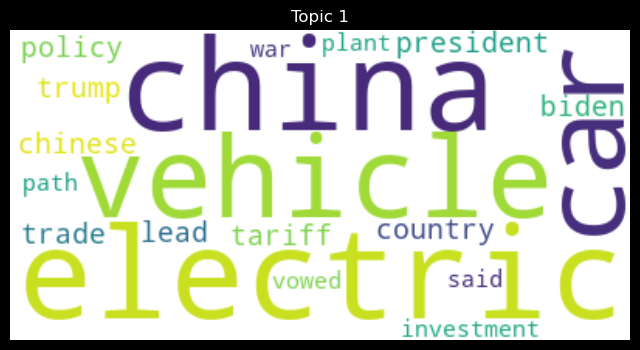

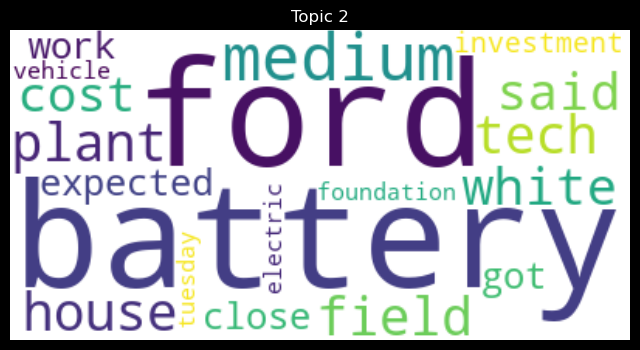

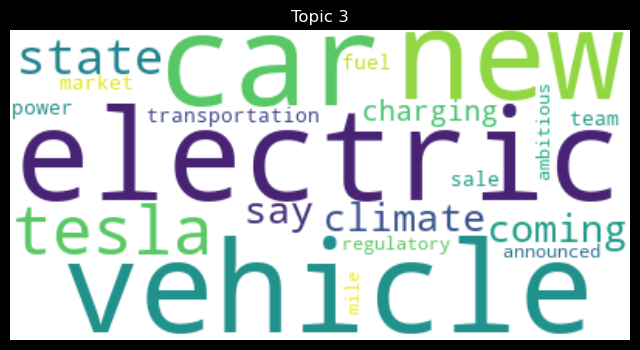

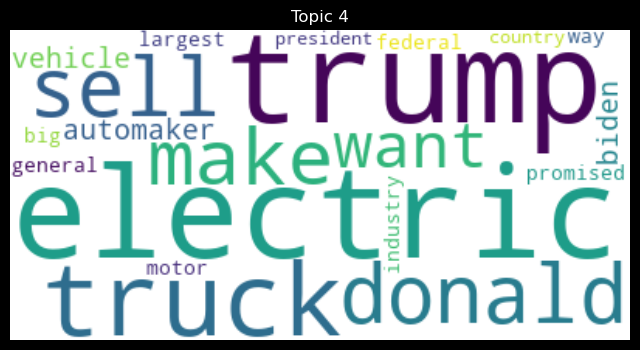

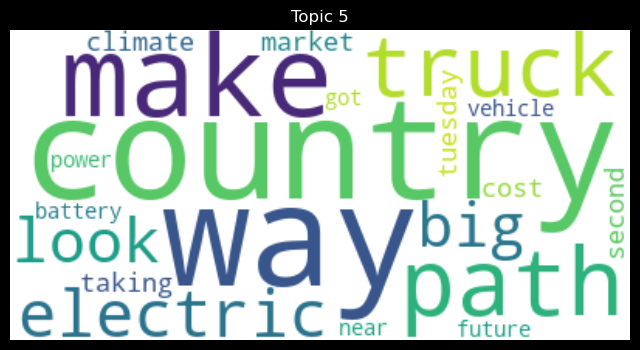

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for each topic
for topic_idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(background_color="white").generate(" ".join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1}")
    plt.show()


### Topic Modelling For Articles ###

### Step 1: Load and Sample 20 Articles ###

In [55]:
import pandas as pd

# Load dataset
df_articles = pd.read_csv("ev_articles_100.csv")

# Sample 20 articles randomly
df_articles = df_articles.sample(n=20, random_state=42)

# Display available columns
print("Available columns:", df_articles.columns)



Available columns: Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name'],
      dtype='object')


### Step 2: Combine Relevant Text Columns ###
Since we don't have the full article text, we will merge headline, abstract, snippet, and lead_paragraph.

In [61]:
# Ensure we only use text-based columns
df_articles["combined_text"] = df_articles[["headline", "abstract", "snippet", "lead_paragraph"]].astype(str).agg(" ".join, axis=1)

# Drop missing values
df_articles = df_articles.dropna(subset=["combined_text"])


### Step 3: Preprocess the Text ###
We remove stopwords, punctuation, and lemmatize for better topic modeling.

In [64]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = word_tokenize(text)  # Tokenize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    return " ".join(words)

# Apply preprocessing
df_articles["clean_text"] = df_articles["combined_text"].apply(preprocess_text)

# Save cleaned data for reference
df_articles.to_csv("ev_articles_cleaned_20.csv", index=False)

# Display first 5 cleaned rows
print(df_articles[["clean_text"]].head())


                                                                                             clean_text
83  main thinking electric car take choice kicker none content_kicker none print_headline debating g...
53  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...
70  main sony take step toward electric car market new subsidiary kicker none content_kicker none pr...
45  main white house condemns elon musk spreading antisemitic racist hate kicker none content_kicker...
44  main ford resume work battery plant michigan reduced scale kicker none content_kicker none print...


[nltk_data] Downloading package punkt to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kaanchi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 4: Convert Text to Numerical Format (TF-IDF) ###
We vectorize the text using CountVectorizer before applying LDA topic modeling.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into a bag-of-words model
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")
X = vectorizer.fit_transform(df_articles["clean_text"])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()


### Step 5: Apply LDA for Topic Modeling ###
Now, let's extract key topics.

In [70]:
from sklearn.decomposition import LatentDirichletAllocation

# Set number of topics
num_topics = 5  # Experiment with different values

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display Topics
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🔹 Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

display_topics(lda, feature_names)



🔹 Topic 1:
electric, china, vehicle, car, president, trump, country, policy, tariff, chinese

🔹 Topic 2:
ford, battery, medium, plant, house, tech, field, white, said, cost

🔹 Topic 3:
electric, vehicle, car, new, tesla, state, coming, climate, say, charging

🔹 Topic 4:
electric, trump, truck, donald, sell, make, want, automaker, biden, vehicle

🔹 Topic 5:
country, way, make, path, truck, electric, look, big, taking, climate


### Step 6: Visualize Topics with WordCloud ###

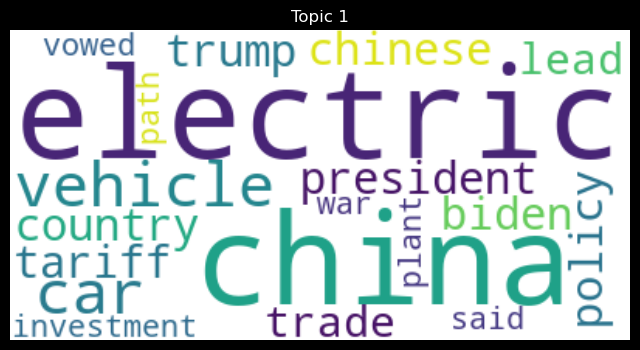

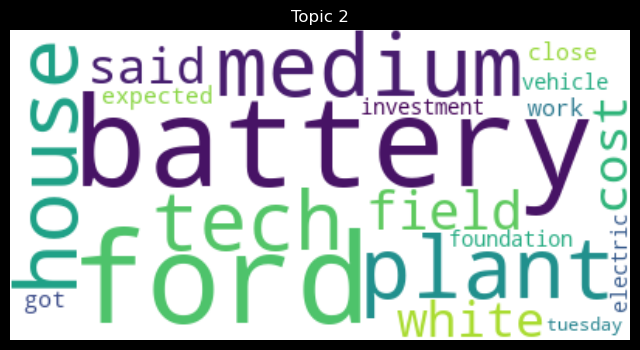

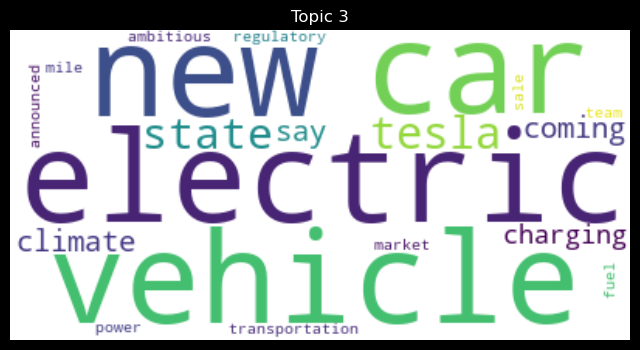

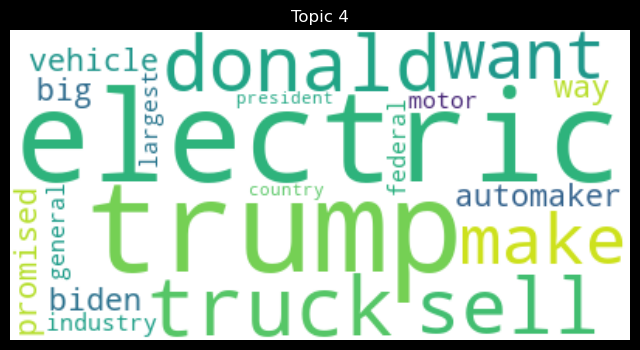

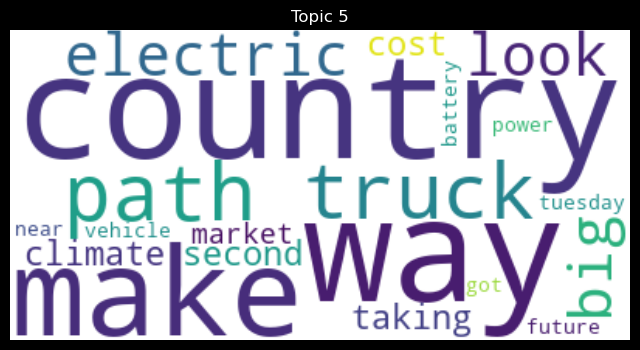

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for each topic
for topic_idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(background_color="white").generate(" ".join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1}")
    plt.show()


### Comparing Topic Modelling for Articles and Comments ###

### Step 1: Load Processed Data ###

In [79]:
import pandas as pd

# Load cleaned article data
df_articles = pd.read_csv("ev_articles_cleaned_20.csv")

# Load cleaned comment data
df_comments = pd.read_csv("ev_comments_sample.csv")

# Display first few rows
print("\n📌 Articles Data Sample:\n", df_articles[["clean_text"]].head())
print("\n📌 Comments Data Sample:\n", df_comments[["comment_text"]].head())



📌 Articles Data Sample:
                                                                                             clean_text
0  main thinking electric car take choice kicker none content_kicker none print_headline debating g...
1  main uber lyft communal tesla kicker none content_kicker none print_headline uber lyft neighbor ...
2  main sony take step toward electric car market new subsidiary kicker none content_kicker none pr...
3  main white house condemns elon musk spreading antisemitic racist hate kicker none content_kicker...
4  main ford resume work battery plant michigan reduced scale kicker none content_kicker none print...

📌 Comments Data Sample:
                                                                                           comment_text
0  This is a truly wonderful example of what is called community capitalism. Tools that matter, tha...
1  @LCM \nIts really just a backdoor method of giving handouts to a primerily illegal immigrant com...
2  instead of blaming

### Step 2: Convert Text into Numerical Format ###
We'll vectorize the text separately for articles and comments.

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert articles into a bag-of-words model
vectorizer_articles = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")
X_articles = vectorizer_articles.fit_transform(df_articles["clean_text"])
article_feature_names = vectorizer_articles.get_feature_names_out()

# Convert comments into a bag-of-words model
vectorizer_comments = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")
X_comments = vectorizer_comments.fit_transform(df_comments["comment_text"])
comment_feature_names = vectorizer_comments.get_feature_names_out()


### Step 3: Apply LDA to Articles & Comments ###

In [85]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5  # Number of topics to extract

# Apply LDA to Articles
lda_articles = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_articles.fit(X_articles)

# Apply LDA to Comments
lda_comments = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_comments.fit(X_comments)


LatentDirichletAllocation(n_components=5, random_state=42)

### Step 4: Compare Topics by Keywords ###

In [88]:
def display_topics(model, feature_names, num_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics.append(topic_keywords)
        print(f"\n🔹 Topic {topic_idx + 1}: {', '.join(topic_keywords)}")
    return topics

# Extract topics
print("\n📰 Articles Topics:")
article_topics = display_topics(lda_articles, article_feature_names)

print("\n💬 Comments Topics:")
comment_topics = display_topics(lda_comments, comment_feature_names)



📰 Articles Topics:

🔹 Topic 1: electric, china, vehicle, car, president, trump, country, policy, tariff, chinese

🔹 Topic 2: ford, battery, medium, plant, house, tech, field, white, said, cost

🔹 Topic 3: electric, vehicle, car, new, tesla, state, coming, climate, say, charging

🔹 Topic 4: electric, trump, truck, donald, sell, make, want, automaker, biden, vehicle

🔹 Topic 5: country, way, make, path, truck, electric, look, big, taking, climate

💬 Comments Topics:

🔹 Topic 1: cars, car, evs, electric, people, ev, just, gas, vehicles, charging

🔹 Topic 2: ev, gas, tax, miles, pay, charging, vehicles, road, vehicle, car

🔹 Topic 3: china, chinese, students, trump, american, like, world, way, just, americans

🔹 Topic 4: china, science, education, students, chinese, trump, people, world, research, industry

🔹 Topic 5: ev, tesla, musk, trump, car, evs, oil, make, people, government


### Step 5: Compute Similarity Between Topics ###

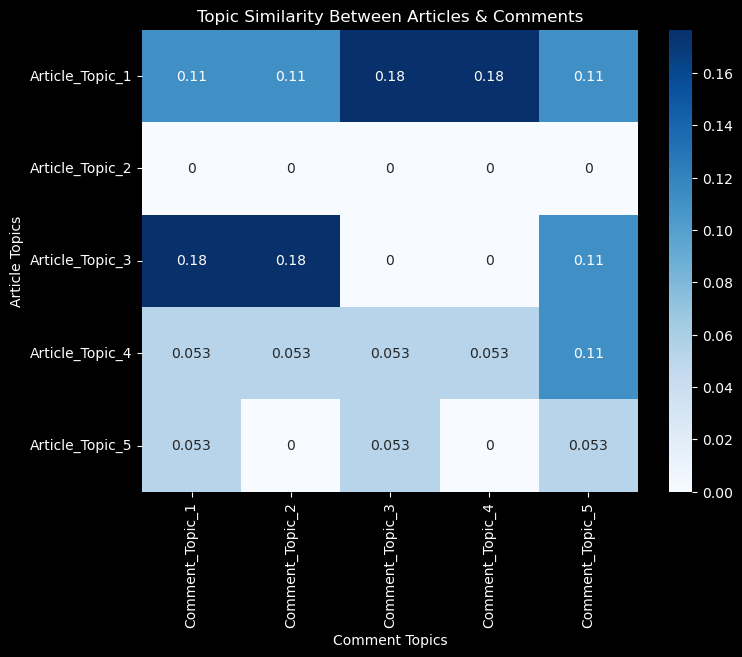


📊 Topic Similarity Matrix:


,Comment_Topic_1,Comment_Topic_2,Comment_Topic_3,Comment_Topic_4,Comment_Topic_5
Article_Topic_1,0.111111,0.111111,0.176471,0.176471,0.111111
Article_Topic_2,0.000000,0.000000,0.000000,0.000000,0.000000
Article_Topic_3,0.176471,0.176471,0.000000,0.000000,0.111111
Article_Topic_4,0.052632,0.052632,0.052632,0.052632,0.111111
Article_Topic_5,0.052632,0.000000,0.052632,0.000000,0.052632


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df_similarity, annot=True, cmap="Blues")
plt.title("Topic Similarity Between Articles & Comments")
plt.xlabel("Comment Topics")
plt.ylabel("Article Topics")

# Show the heatmap
plt.show()

# **Save similarity matrix as CSV instead of using ace_tools**
df_similarity.to_csv("topic_similarity_matrix.csv", index=True)

# **Display DataFrame in Jupyter Notebook**
print("\n📊 Topic Similarity Matrix:")
display(df_similarity)



### Step 6: Visualize Overlapping & Unique Topics ###

C:\Users\Kaanchi Gupta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


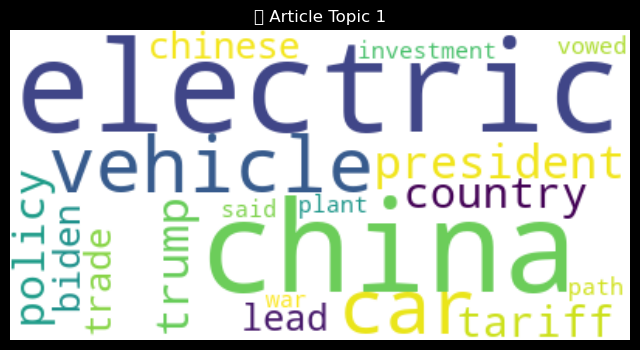

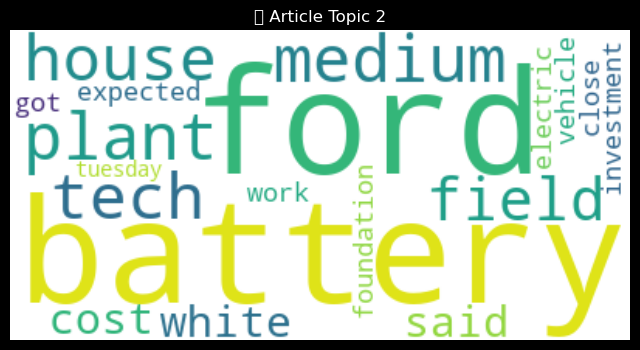

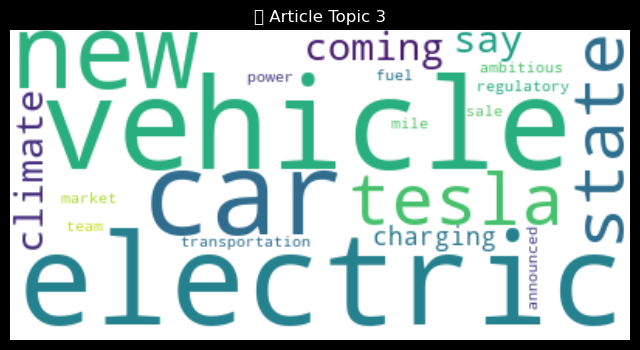

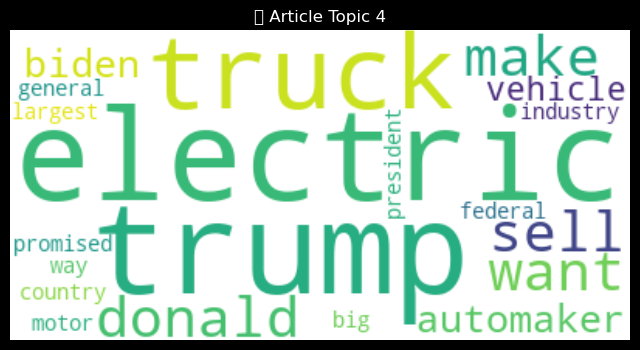

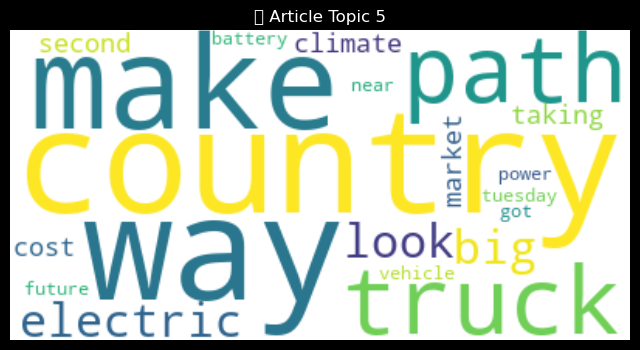

C:\Users\Kaanchi Gupta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


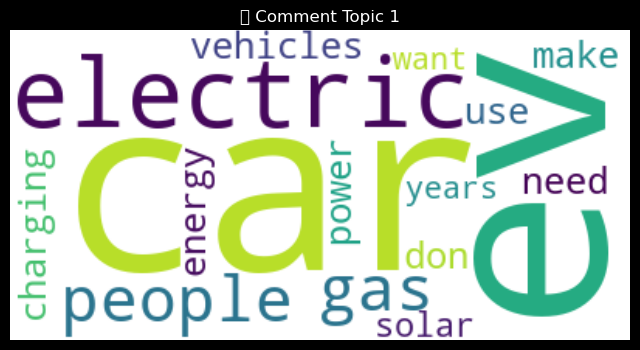

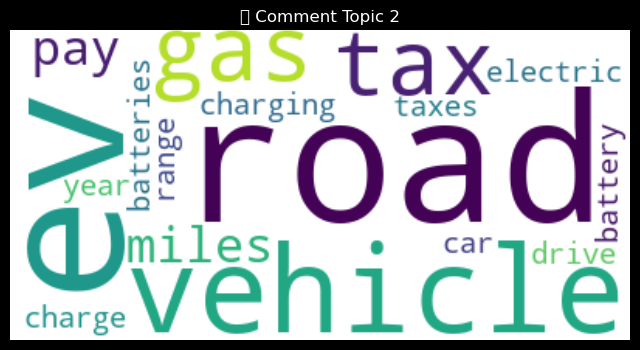

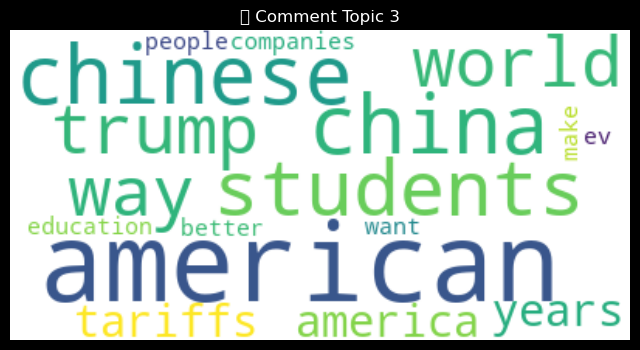

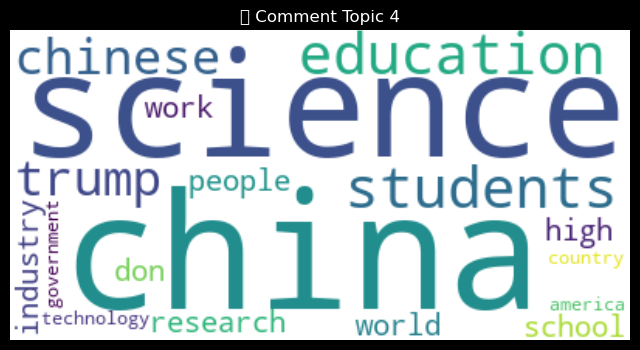

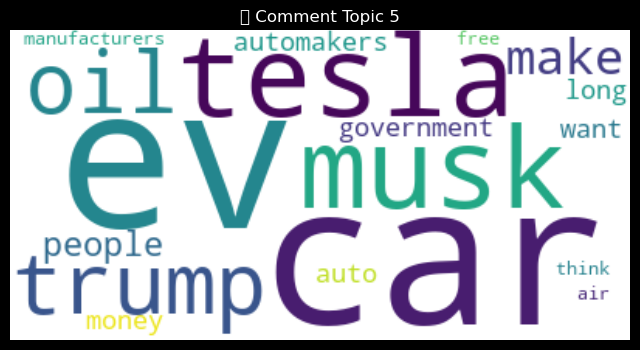

In [106]:
from wordcloud import WordCloud

# Generate word clouds for Articles
for topic_idx, topic in enumerate(lda_articles.components_):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(background_color="white").generate(" ".join([article_feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"📰 Article Topic {topic_idx + 1}")
    plt.show()

# Generate word clouds for Comments
for topic_idx, topic in enumerate(lda_comments.components_):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(background_color="white").generate(" ".join([comment_feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"💬 Comment Topic {topic_idx + 1}")
    plt.show()
